<h2> GOOGLE PLAYSTORE DATASET ANALYSIS </h2>
<li> <b>Dataset:</b> https://www.kaggle.com/lava18/google-play-store-apps *as on 16.09.2020*</li> 
<li> <b>Goal:</b> Perform exploratory data analysis and visualizations </li>
<li> <b>List of Questions: </b> </li> <br>
<ol> 1. Distribution of free and paid apps by category </ol>
<ol> 2. Popularity of free and paid apps by category </ol>
   

In [1]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import dataset

gps_ds = pd.read_csv(r"~\googleplaystore_analysis\data\raw\googleplaystore.csv") #edit this
gps_ds.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning 
#### Step 1: Check for datatype incompatibilities

**Inferences:** We beed to cast some of the fields as follows: 
- 'Price' --> float
- 'Last-Updated' --> datetime
- 'Rating' --> float
- 'Reviews' --> Integer
- 'Size' and 'Installs' --> --tba--

In [6]:
#gps_ds.info()

# dropping one row from the dataset which is of poor quality before datatype casting
gps_ds = gps_ds[gps_ds.App != "Life Made WI-Fi Touchscreen Photo Frame"]


In [7]:
# Column type casting

gps_ds["Reviews"] = pd.to_numeric(gps_ds["Reviews"])
gps_ds["Rating"] = pd.to_numeric(gps_ds["Rating"])

# remove the currency code and then cast to numeric
gps_ds["Price"] = gps_ds["Price"].map(lambda x:x.lstrip('$'))
gps_ds["Price"] = pd.to_numeric(gps_ds["Price"])

gps_ds["Last Updated"] = pd.to_datetime(gps_ds["Last Updated"])

# remove the symbols + and , and then cast to numeric
gps_ds["Installs"] = gps_ds["Installs"].map(lambda x:x.rstrip('+'))
gps_ds["Installs"] = gps_ds["Installs"].str.replace(',','')
gps_ds["Installs"] = pd.to_numeric(gps_ds["Installs"])
#################################### end of casting ####################################

#gps_ds.info()

#### Step 2: NaN(null) value handling :-


In [8]:
# Step 2.1: Let's check the NaN stats(count) across the dataframe first
print(gps_ds.isnull().sum())

# Step 2.2: We can infer that, there is about 13.59% records with missing values for the 'Rating' attribute. We can impute this with 0s because:
# It is safe to assume that apps whose reviews are filled with NaN could mean that there has been no reviews yet. Since the other records have count of reviews in this dataset, let us replace NaN with 0 safely and avoid losing these records otherwise.

gps_ds["Reviews"] = gps_ds["Reviews"].fillna(0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


#### Preliminery data analysis for understanding


In [9]:
print("1. Most popular categories in terms of no. of apps:\n")
print(gps_ds.groupby(["Category","Type"])["Category"].count().sort_values(ascending=False).head(10))


1. Most popular categories in terms of no. of apps:

Category       Type
FAMILY         Free    1780
GAME           Free    1061
TOOLS          Free     765
BUSINESS       Free     446
PRODUCTIVITY   Free     396
LIFESTYLE      Free     363
SPORTS         Free     360
COMMUNICATION  Free     360
MEDICAL        Free     354
FINANCE        Free     349
Name: Category, dtype: int64


## DATA ANALYSIS AND VISUALIZATION
### 1. Distribution of free and paid apps by category:

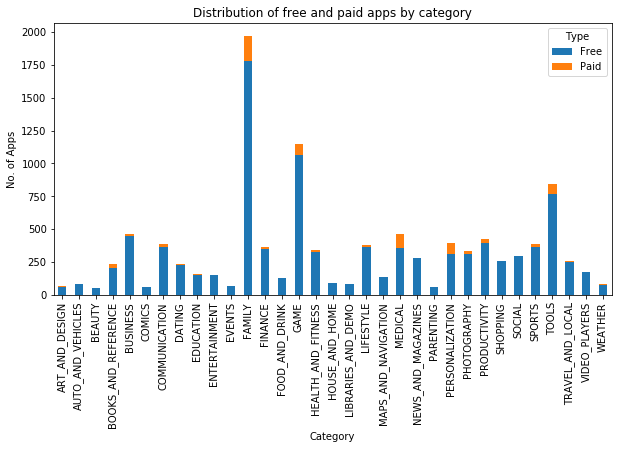

In [10]:
## Let us visualise the distribution of apps as a stacked bar chart were blue and orange colors denote Free and Paid apps respectively.
apps_by_category = gps_ds.groupby(["Category","Type"])["App"].count()
apps_by_category = apps_by_category.unstack()
print('\n')
apps_by_category.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title("Distribution of free and paid apps by category")
plt.xlabel("Category")
plt.ylabel("No. of Apps")
plt.show()

_'Family','Game' and 'Tools' seem to be the top 3 popular category in both Paid and Free apps_

### 2. Distribution of free and paid apps by category and no. of downloads:

In [11]:
gps_ds.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [12]:
# Let us convert the no. of Installs into categorical data for a better summary
buckets = pd.cut(gps_ds.Installs,bins=[0,1000,100000,100000000,10000000000],labels=['0-1000','1001-100000','100001-100000000','100000001-10000000000'])
gps_ds.insert(5,"downloads_range",buckets)

In [13]:
# splitting the main df into two:
apps_by_download_free = gps_ds.loc[gps_ds['Type'] == "Free"]
apps_by_download_paid = gps_ds.loc[gps_ds['Type'] == "Paid"]

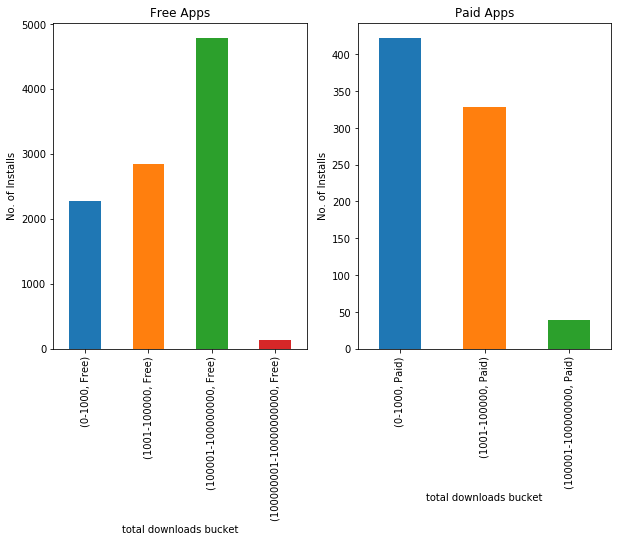

In [14]:
# Create a subplot of dimension 1 row X 2 columns
installs_free = apps_by_download_free.groupby(["downloads_range","Type"])["Type"].count()
installs_paid = apps_by_download_paid.groupby(["downloads_range","Type"])["Type"].count()

fig = plt.figure()

# cell 1x1 of a 1x2 grid, for Free Apps category and cell 1x2 for Paid Apps:

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

installs_free.plot(kind='bar',x='downloads_range', ax=ax1, legend=False,title="Free Apps",figsize=(10,6))
installs_paid.plot(kind='bar',x='downloads_range', ax=ax2, legend=False,title="Paid Apps",figsize=(10,6))

ax1.set(xlabel='total downloads bucket', ylabel='No. of Installs')
ax2.set(xlabel='total downloads bucket', ylabel='No. of Installs')

plt.show()
fig2 = plt.show()

#df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

_ We can see that, only a few number of free apps are extremely successful. and not many download paid apps in comparison_ 

### 3. Effect of Price and size in the no. of downloads of Paid Apps:

In [15]:
apps_by_download_paid = apps_by_download_paid.drop_duplicates(keep='first')

In [16]:
apps_by_download_paid.head(5)

,App,Category,Rating,Reviews,Size,downloads_range,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,1001-100000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,1001-100000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,1001-100000,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,1001-100000,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,0-1000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


### 4. Are apps worth buying? (analysis based on average user rating)

In [17]:
apps_by_download_paid.head(5)

,App,Category,Rating,Reviews,Size,downloads_range,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,1001-100000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,1001-100000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,1001-100000,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,1001-100000,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,0-1000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


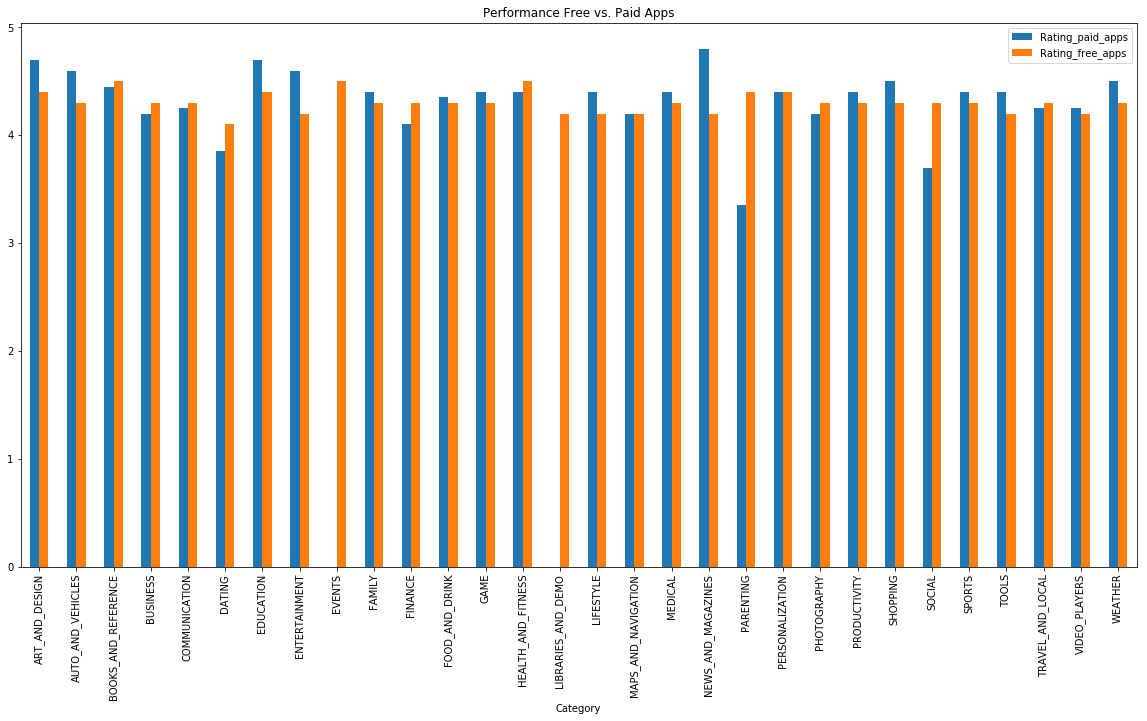

In [18]:

df1 = apps_by_download_paid.groupby(["Category"])["Rating"].median().sort_values(ascending=False).to_frame()
df2 = apps_by_download_free.groupby(["Category"])["Rating"].median().sort_values(ascending=False).to_frame()
rating_comparison = df1.join(df2,on='Category',lsuffix='_paid_apps',rsuffix='_free_apps').sort_values('Category')

fig3 = rating_comparison.plot(kind='bar',y=['Rating_paid_apps','Rating_free_apps'],title='Performance Free vs. Paid Apps',figsize=(20,10))

_looks like paid apps perform marginally better than the free apps_